<a href="https://colab.research.google.com/github/aflattcontractengineer/nerdy-jon/blob/master/Python_Final_W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup - Run the following code to get started

In [0]:
# Options to display more rows and columns
# DO NOT REMOVE

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

---
# Exercise
<span  style="color:purple; font-size:20px">
Python  
</span>

---

## Yelp Data

For this exercise, you will analyze data that has been made publicly available for educational and academic purposes. The data contains 3 main tables we will analyze:

  + `yelp_academic_dataset_business.csv` - contains information about  a subset of businesses having at least one Yelp review. Every distinct business has a unique `business_id`
  
  + `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review
  
  + `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`
   
## What you need to do

Your goal in this notebook is to work through the problems below to perform some brief analyses of the `yelp_academic_dataset_business.csv` data. 

As always, it can be useful to document your thoughts, strategy, and assumptions as you go. If you are stuck on a particular problem, write down what you are trying to do and why you think you may be getting stuck.

In [0]:
# Load the libraries you need...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Load the data

business_data = pd.read_csv(r'data-sets/yelp_academic_dataset_business.csv')
business_data.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HairSpecializesIn,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,business_id,categories,city,hours,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,NaN,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,True,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,True,casual,NaN,False,True,2.0,False,False,True,NaN,True,no,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NaN,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,False,NaN,NaN,free,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,NaN,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


## Task Set #1 - Explore and Clean

### Problem 1: (5 points)

<span  style="color:purple; font-size:16px">The `yelp_academic_dataset_business.csv` data has been loaded for you as a Pandas DataFrame called `business_data`. Determine the  number of rows and columns of the data. Is the data in a tidy format? Briefly explain your reasoning about why you think the data is/is not tidy.</span>

In [0]:
# Your code here
m_size = business_data.shape[:2]
print("Number of Rows: "+str(m_size[0]))
print("Number of Columns: "+str(m_size[1]))

Number of Rows: 188593
Number of Columns: 61


#### Written Answer:

*{Type your answer here}*
This data is not a tidy format because this one are including many NaN cells in data as we can see above table and including the string data and numerical data for same column as postal_code. 



### Problem 2: (5 points)

<span  style="color:purple; font-size:16px">Determine the number of columns of each data type in `business_data`: object, float64, int64. </span>

In [0]:
# Your code here

m_types = business_data.dtypes
type_list = {"object":0, "float64":0, "int64":0}

for n in range(len(m_types)):
    if m_types[n].name == "object":
        type_list["object"]+=1
    elif m_types[n].name == "float64":
        type_list["float64"] += 1
    elif m_types[n].name == "int64":
        type_list["int64"] += 1

print("object: ", type_list["object"])
print("float64: ", type_list["float64"])
print("int64: ", type_list["int64"])

object:  53
float64:  6
int64:  2


### Problem 3: (5 points)

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of missing values in each column of `business_data`.</span>

In [0]:
# Your code here
proportion_val = []
label_str = list(business_data)
for n in range(m_size[1]):
    tmp = business_data.loc[business_data[label_str[n]].isnull()==True]
    proportion_val.append(np.double(len(tmp))/m_size[0] )

proportion_Series = pd.Series(proportion_val)
print(proportion_Series)

0     0.040420
1     1.000000
2     0.938115
3     0.997895
4     0.746056
5     0.747727
6     0.995169
7     0.992529
8     0.963710
9     0.549872
10    0.932797
11    0.255587
12    0.451602
13    0.759148
14    0.787702
15    0.954765
16    0.996516
17    0.999268
18    0.927458
19    0.964187
20    0.951419
21    0.655708
22    0.748225
23    0.990026
24    0.950767
25    0.747960
26    0.953302
27    0.768231
28    0.998134
29    0.712709
30    0.744519
31    0.997895
32    0.726034
33    0.714523
34    0.432004
35    0.727652
36    0.770272
37    0.675460
38    0.956981
39    0.724152
40    0.740043
41    0.000000
42    0.002869
43    0.000053
44    1.000000
45    0.248138
46    0.296045
47    0.335203
48    0.504823
49    0.245152
50    0.254442
51    0.247888
52    0.000000
53    0.000032
54    0.000032
55    0.000000
56    0.635962
57    0.003611
58    0.000000
59    0.000000
60    0.000000
dtype: float64


<span  style="color:purple; font-size:16px">How many variables have no missing values?</span>

In [0]:
# Your code here
no_missing_list = proportion_Series[proportion_Series == 0]
print("no missing values: ", len(no_missing_list))

no missing values:  6


### Problem 4: (5 points)

<span  style="color:purple; font-size:16px">Use an appropriate visualization technique to analyze the missingness in `business_data`.</span>

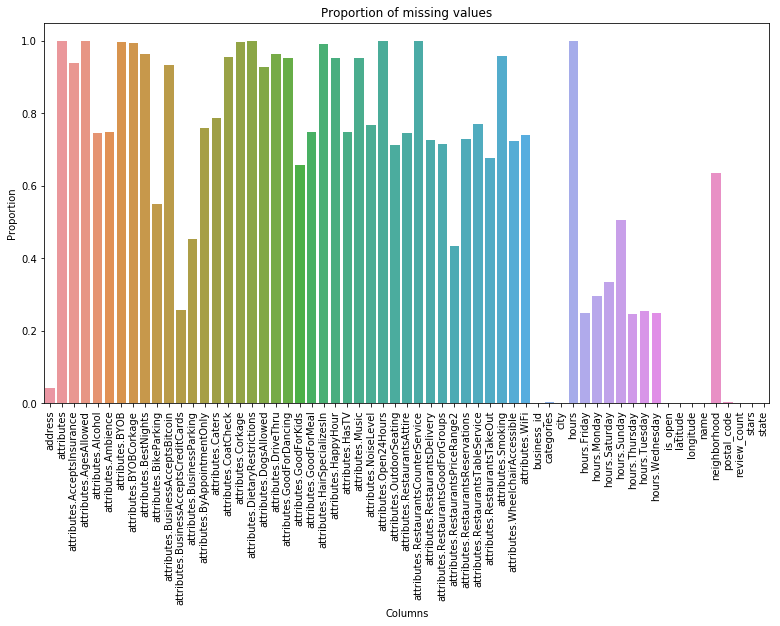

In [0]:
# Use a heatmap, pointplot, or other appropriate visualization here
plt.figure(figsize=(13,7))
ax = sns.barplot(x=label_str, y=proportion_Series)
ax.set_xticklabels(label_str, rotation=90)
plt.title("Proportion of missing values")
plt.xlabel("Columns")
plt.ylabel("Proportion")
plt.show()

### Problem 5: (5 points)

<span  style="color:purple; font-size:16px">Drop all columns that contain **only missing values** from `business_data`.</span>

In [0]:
# Your code here
label_str1 = np.array(label_str)
label_str1 = label_str1[proportion_Series == 1]
business_data = business_data.drop(label_str1, axis=1)
business_data.head()

,address,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HairSpecializesIn,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,business_id,categories,city,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,True,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,True,casual,NaN,False,True,2.0,False,False,True,NaN,True,no,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,False,NaN,NaN,free,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


### Problem 6: (5 points)

<span  style="color:purple; font-size:16px">The `business_data` is not in a form that is convenient for analysis. Let's begin by cleaning up the variable names. </span>

Tasks:

1. Make all column names lowercase.
1. Replace all periods `.` with an underscore _

In [0]:
# Your code here
label_str = list(business_data)
lower_label_str = label_str
for n in range(len(label_str)):
    lower_label_str[n] = str(label_str[n].lower()).replace(".","_")

business_data.columns = lower_label_str  
print(business_data.columns )

Index(['address', 'attributes_acceptsinsurance', 'attributes_agesallowed', 'attributes_alcohol',
       'attributes_ambience', 'attributes_byob', 'attributes_byobcorkage', 'attributes_bestnights',
       'attributes_bikeparking', 'attributes_businessacceptsbitcoin',
       'attributes_businessacceptscreditcards', 'attributes_businessparking',
       'attributes_byappointmentonly', 'attributes_caters', 'attributes_coatcheck',
       'attributes_corkage', 'attributes_dietaryrestrictions', 'attributes_dogsallowed',
       'attributes_drivethru', 'attributes_goodfordancing', 'attributes_goodforkids',
       'attributes_goodformeal', 'attributes_hairspecializesin', 'attributes_happyhour',
       'attributes_hastv', 'attributes_music', 'attributes_noiselevel', 'attributes_open24hours',
       'attributes_outdoorseating', 'attributes_restaurantsattire',
       'attributes_restaurantscounterservice', 'attributes_restaurantsdelivery',
       'attributes_restaurantsgoodforgroups', 'attributes_re

### Problem 7: (5 points)

<span  style="color:purple; font-size:16px">Let's now get rid of columns that we don't need right now. Perform the following transformation steps to the data.</span>

1. Drop all `attribute_*` columns except for the `attributes_happyhour` column.
1. Create a new column, called `open_on_weekends`, that is a 1 if the business is open on the weekend (has a non-null value for either `hours_saturday` or `hours_sunday`) and 0 otherwise.
1. Drop all of the `hours_*` columns after creating the `open_on_weekends` column.

In [0]:
# Drop all of the unwanted attributes columns
filter_column = []
for n in range(len(lower_label_str)):
    if str(lower_label_str[n])!="attributes_happyhour" and str(lower_label_str[n]).__contains__('attributes_'):
        filter_column.append(str(lower_label_str[n]))

business_data = business_data.drop(filter_column, axis=1)
business_data.head()

,address,attributes_happyhour,business_id,categories,city,hours_friday,hours_monday,hours_saturday,hours_sunday,hours_thursday,hours_tuesday,hours_wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


In [0]:
# Create open_on_weekends
tmp_data = np.array([0]*m_size[0])

bool_index = ((business_data['hours_saturday'].notnull() == True)| (business_data['hours_sunday'].notnull() ==True))
tmp_data[bool_index] = 1

business_data["open_on_weekends"] = tmp_data

business_data.head()

,address,attributes_happyhour,business_id,categories,city,hours_friday,hours_monday,hours_saturday,hours_sunday,hours_thursday,hours_tuesday,hours_wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends
0,1314 44 Avenue NE,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB,1
1,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1
2,1335 rue Beaubien E,NaN,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC,1
3,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ,0
4,2005 Alyth Place SE,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB,0


In [0]:
# Remove hours.* columns
filter_column = []
label_str = list(business_data)

for n in range(len(label_str)):
    if str(label_str[n]).__contains__('hours_'):
        filter_column.append(str(label_str[n]))

business_data = business_data.drop(filter_column, axis=1)

print(business_data.columns)
business_data.head()

Index(['address', 'attributes_happyhour', 'business_id', 'categories', 'city', 'is_open',
       'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars',
       'state', 'open_on_weekends'],
      dtype='object')


,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends
0,1314 44 Avenue NE,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB,1
1,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1
2,1335 rue Beaubien E,NaN,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC,1
3,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ,0
4,2005 Alyth Place SE,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB,0


### Problem 8: (5 points)

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of business in the data by state. (For now, a *state* refers to any level of the `state` variable, not only states in the U.S.A.)</span>

In [0]:
# Number of businesses by state
state_data = np.unique(business_data['state'])
proportion_state_val = []

for n in range(len(state_data)):
    tmp = business_data.loc[business_data['state']==state_data[n]]
    proportion_state_val.append(np.double(len(tmp))/len(business_data))

state_Series = pd.Series(state_data)
proportion_state_Series = pd.Series(proportion_state_val)

print("Unique State count: ", len(state_data))
print("Unique state: ", state_data)

print("**** state Series ********")
print(state_Series)

print("**** proportion state Series ********")
print(proportion_state_Series)

Unique State count:  69
Unique state:  ['01' '10' '11' '4' '45' '6' 'AB' 'AG' 'AL' 'AR' 'AZ' 'B' 'BC' 'BY' 'C'
 'CA' 'CC' 'CMA' 'CO' 'CRF' 'CS' 'DE' 'FL' 'G' 'GA' 'HE' 'HH' 'HU' 'IL'
 'IN' 'KY' 'LU' 'M' 'MA' 'MN' 'MO' 'MT' 'NC' 'NE' 'NI' 'NLK' 'NV' 'NW'
 'NY' 'NYK' 'O' 'OH' 'ON' 'OR' 'PA' 'PO' 'QC' 'RCC' 'RP' 'SC' 'SG' 'SP'
 'ST' 'TAM' 'V' 'VA' 'VS' 'VT' 'WA' 'WAR' 'WHT' 'WI' 'XGM' 'XMS']
**** state Series ********
0      01
1      10
2      11
3       4
4      45
5       6
6      AB
7      AG
8      AL
9      AR
10     AZ
11      B
12     BC
13     BY
14      C
15     CA
16     CC
17    CMA
18     CO
19    CRF
20     CS
21     DE
22     FL
23      G
24     GA
25     HE
26     HH
27     HU
28     IL
29     IN
30     KY
31     LU
32      M
33     MA
34     MN
35     MO
36     MT
37     NC
38     NE
39     NI
40    NLK
41     NV
42     NW
43     NY
44    NYK
45      O
46     OH
47     ON
48     OR
49     PA
50     PO
51     QC
52    RCC
53     RP
54     SC
55     SG
56     SP
57     ST
5

<span  style="color:purple; font-size:16px">How many unique states are represented in the data? Are all of them in the United States of America? Do all of the levels of `state` make sense?</span>

#### Written Answer:

*{Type your answer here}*

As we can see above results, the number of the unique states is 69 and they are not United States of America. We can decide that these result makes sense for the levels of state.

### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">These data are fairly large! Let's focus on the data from a few key states. The goal in this exercise is to subset `business_data` to only contain businesses in the 5 states having the largest total number of businesses in the state. (Again, *state* does not need to correspond to a state in the U.S.A. but simply refers to a level of the `state` column.)</span>

Tasks:

1. Extract the 5 states from `state_counts` with the largest number of businesses
2. Subset `business_data` to only contain observations from these top-5 states

In [0]:
# Your code here
frame = { 'state': state_Series, 'state_counts': proportion_state_Series } 
dataframe1 = pd.DataFrame(frame)
dataframe1 = dataframe1.sort_values(by='state_counts', ascending=False)

dataframe1.head(10)
top_5_state = np.array(dataframe1[0:5]['state'])
print("top-5 state: ", top_5_state)


top5_business_data = []
for n in range(len(top_5_state)):
    tmp = business_data.loc[business_data['state']==top_5_state[n]]
    if n==0:
        top5_business_data = tmp
    else:
        top5_business_data = top5_business_data.append(tmp, ignore_index=True)

top5_business_data.head()
business_data = top5_business_data

top-5 state:  ['AZ' 'NV' 'ON' 'NC' 'OH']


### Problem 10:  (5 points)

<span  style="color:purple; font-size:16px">Import the `territory_abbr.csv` data which contains a record for every U.S. state and territory. Use this data to **remove** businesses outside of the United States *by* performing an appropriate **merge** with `business_data`. Assign the remaining data to a DataFrame called `business_data_subset`.</span>

(Of course...you could probably figure out what state(s) need to be removed just by looking at them. The point is to demonstrate that you can use `merge()` and any necessary arguments to accomplish the task. Also...don't mess up your tidy data! Though not necessary for full credit, you may want to remove/modify columns that are not lowercase.)

In [0]:
# Read in data

us_data = pd.read_csv('data-sets/territory_abbr.csv')
us_data.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [0]:
# Your code here
business_data_subset = pd.merge(left=business_data,right=us_data, left_on='state', right_on='Abbreviation')
business_data_subset = business_data_subset.drop(['Abbreviation'],axis=1)
business_data_subset.head()

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends,State
0,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ,0,Arizona
1,"20235 N Cave Creek Rd, Ste 1115",NaN,45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,NaN,85024,63,4.0,AZ,1,Arizona
2,1440 N. Dysart Ave,NaN,8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,1,33.448106,-112.341302,Filiberto's Mexican Food,NaN,85323,40,2.5,AZ,1,Arizona
3,2801 N 15th Ave,True,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,1,33.479807,-112.091188,Original Hamburger Works,NaN,85007,277,4.0,AZ,1,Arizona
4,4131 N 83rd Ave,NaN,3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,1,33.495298,-112.236076,Rib Shop,NaN,85033,3,2.5,AZ,0,Arizona


<span  style="color:purple; font-size:16px">How many unique U.S. states are left in the data?</span>

In [0]:
# Your code here
unique_state = np.unique(business_data_subset['state'])

print("Number of unique U.S. states: ", len(unique_state))
print("unique state: ",unique_state)

Number of unique U.S. states:  4
unique state:  ['AZ' 'NC' 'NV' 'OH']


## Task Set #2 - Analysis

---

### Problem 11: (5 points)

<span  style="color:purple; font-size:16px">Do businesses with more reviews tend to have higher ratings? </span> 

<span  style="color:purple; font-size:16px">To help answer this question, use `business_data` to create *side-by-side notched boxplots* to visualize the relationship between the number of reviews left for the business (`review_count`, y-axis) and the rating of the business (`stars`, x-axis).</span> 
    
<span  style="color:purple; font-size:16px">**Note: use `ax.set_yscale('log')` to set the scale of the y-axis to be logarithmic due to extreme variation in the number of reviews left for the businesses. This means you must specify a figure and axes object using `fig, ax = plt.subplots(figsize=(10, 10))`**</span>
    
<span>Make sure to use appropriate axes labels and include an appropriate title. Make the figure 10 units tall and 10 units wide.</span>

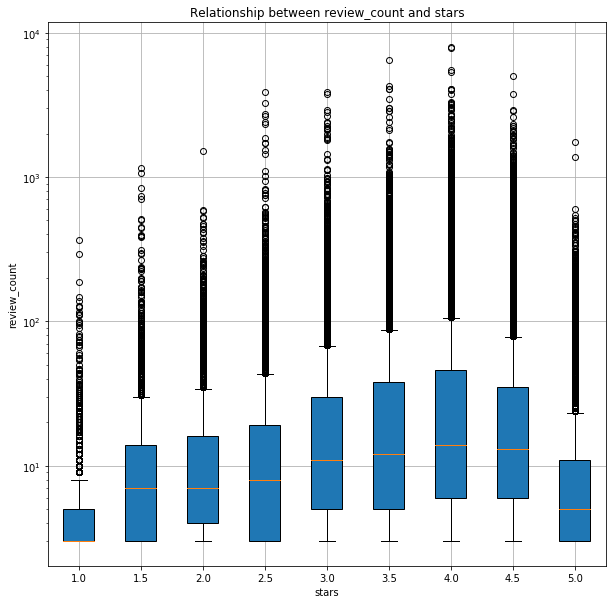

In [0]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_yscale('log')

plotData = []
dataframe1 = pd.DataFrame([],columns=[""])

unique_stars = np.unique(business_data['stars'])
for n in range(len(unique_stars)):
    tmp = business_data.loc[business_data['stars']==unique_stars[n],'review_count']
    plotData.append(np.array(tmp))

ax.boxplot(plotData, labels=unique_stars, patch_artist=True)

plt.xlabel('stars')
plt.ylabel('review_count')
plt.title('Relationship between review_count and stars')
plt.grid()
plt.show()


<span  style="color:purple; font-size:16px">Describe what you see in the plot and formulate a hypothesis about why the relationship between these variables looks the way it does.</span>

#### Written Answer:

*{Type your answer here}*

We saw the relationship between review_count and stars variable. That is, this plot shows the distribution of review_count corresponding with each star. As we can see the plot, when the star is 4.0, review_count is best larger and when it is 1.0, review_count is best lower.
Thus, we can know that this plot follows with normal distribution with mean=4.0 and certain std.
Therefore, 
$$F(X) = {1\over \sqrt{2\pi \sigma^2}} 	\int_{-\infty}^{x} exp^{-{(x-\mu)^2\over 2 \sigma^2}}dx,
   \mu=4.0$$


### Problem 12: (5 points)

<span  style="color:purple; font-size:16px">The `categories` column of `business_data_subset` contains a *comma separated* list of various keyword categories for each business. Use an appropriate Python data structure to iterate over every row of the data and determine all of the unique categories as well as the number of times each category appears, sorted from most common category to least common category.</span>

Your result should look like the following:

<pre>
Restaurants                  234
Shopping                     173
Home Services                132
Food                         120
Health & Medical              92
.
.
.

In [0]:
# Your code here 
data22 = business_data_subset['categories']
dict_data = {}
for n in range(len(data22)):
    tmp = str(data22[n]).split(',')
    for m in range(len(tmp)):
        m_str = tmp[m].strip()
        if dict_data.get(m_str)==None:
            dict_data[m_str] = 1
            # dict_data.update(tmp[m],0)
        else:
            dict_data[m_str]+=1


sortedData = sorted(dict_data.items(), key=lambda x: x[1], reverse=True)

for n in range(len(sortedData)):
    print("%30s %10d"%(sortedData[n][0],sortedData[n][1]))

                   Restaurants      27708
                      Shopping      19978
                 Home Services      15731
                          Food      14051
                 Beauty & Spas      12980
              Health & Medical      12934
                Local Services       9901
                    Automotive       9505
                     Nightlife       6825
     Event Planning & Services       6359
                   Active Life       6251
                          Bars       5808
         Professional Services       4759
                       Doctors       4731
                       Fashion       4731
                   Hair Salons       4633
                   Real Estate       4624
                     Fast Food       4442
        American (Traditional)       4331
                 Home & Garden       4220
                   Auto Repair       4203
                    Sandwiches       4039
          Arts & Entertainment       3856
               Hotels & Travel    

<span  style="color:purple; font-size:16px">How many distinct categories are in `business_data_subset`?</span>

In [0]:
# Number of distinct categories equal to the number of rows
print("Number of categories: ", len(sortedData))


Number of categories:  1261


### Problem 13: (5 points)

<span  style="color:purple; font-size:16px">For this question, we want to see if we can use the `categories` variable from the `business_data_subset` table to extract the records belonging to **food establishments** - any place that someone could go to get a freshly prepared meal.</span>

<span  style="color:purple; font-size:16px">Create a copy of the Pandas DataFrame called `food_establishments` which contains all business in `business_data_subset` that contain either *dining* or *restaurant* in their list of categories. (Make sure to ignore case.) How many food establishments are captured using this method?</span>

Hint: This can be accomplished in at least two ways. No reasonable method is bad! Create a new variable and use it to filter observations or directly subset the data. Your choice!

In [0]:
# Your code here
food_establishments = business_data_subset.copy()

category_data = np.array(food_establishments['categories'])

filter_data = [0]*len(category_data)
for n in range(len(category_data)):
    if str(category_data[n]).__contains__('Dining') or str(category_data[n]).__contains__('Restaurant') :
        filter_data[n] = 1

food_establishments["category_flag"]= filter_data
food_establishments = food_establishments.loc[food_establishments["category_flag"]==1]
food_establishments = food_establishments.drop('category_flag',axis=1)

food_establishments.head()

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends,State
2,1440 N. Dysart Ave,NaN,8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,1,33.448106,-112.341302,Filiberto's Mexican Food,NaN,85323,40,2.5,AZ,1,Arizona
3,2801 N 15th Ave,True,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,1,33.479807,-112.091188,Original Hamburger Works,NaN,85007,277,4.0,AZ,1,Arizona
4,4131 N 83rd Ave,NaN,3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,1,33.495298,-112.236076,Rib Shop,NaN,85033,3,2.5,AZ,0,Arizona
5,7745 W Thomas Rd,NaN,CeuTRtwsq6w5rztGOyNMPg,"Mexican, Restaurants",Phoenix,1,33.479671,-112.225173,Salsitas,NaN,85033,14,2.5,AZ,0,Arizona
9,4145 N 83Rd,NaN,AcGRSWCpb7YB95MTsHlGEw,"Pizza, Fast Food, Restaurants",Phoenix,1,33.495422,-112.235798,Little Caesars Pizza,NaN,85033,4,2.0,AZ,1,Arizona


### Problem 14: (5 points)

<span  style="color:purple; font-size:16px">Using the `food_establishments` table, create a table with `stars` as the index, `state` as the columns, and the conditional `stars` distribution of food establishments for each `state` as values.</span>

<span  style="color:purple; font-size:16px">Include the marginal `stars` distribution in your table by using the appropriate `margins` argument. Create a valid conditional `stars` distribution for each state using the `normalize = 'columns'` argument.</span>

You can check that you have successfully create valid conditional `stars` distributions for each state by verifying each column sums to 1. 

Your final table should look similar to the table below with the appropriate values imputed for `val`.

| state  	|  AZ 	| NV  	| NC  	| OH  | All |
|---	|---	|---	|---	|---  |---  |
|   stars 	|
|   1 	|   val	|  val 	|  val 	| val   | val    |
|   1.5	|   val	|  val	|  val 	| val   | val    |
|   2	|   val	|  val 	|  val 	| val   | val    |
|   2.5	|   val	|  val	|  val 	| val   | val    |
|   3	|   val	|  val 	|  val 	| val   | val    |
|   3.5	|   val	|  val	|  val 	| val   | val    |
|   4	|   val	|  val 	|  val 	| val   | val    |
|   4.5	|   val	|  val 	|  val 	| val   | val    |
|   5	|   val	|  val 	|  val 	| val   | val    |

In [0]:
# Your code here
table1 = pd.crosstab(food_establishments.stars, food_establishments.state, normalize='columns',margins=True)

table1

state,AZ,NC,NV,OH,All
stars,,,,,
1.0,0.006136,0.009119,0.003765,0.012701,0.007142
1.5,0.024274,0.029998,0.022862,0.026196,0.025105
2.0,0.064248,0.062155,0.062668,0.061520,0.063014
2.5,0.107562,0.106791,0.103685,0.109149,0.106695
3.0,0.176051,0.183345,0.166218,0.167494,0.172955
3.5,0.232990,0.235661,0.237090,0.237150,0.235247
4.0,0.248150,0.234941,0.246369,0.240524,0.244301
4.5,0.114781,0.111831,0.126950,0.118674,0.118309
5.0,0.025808,0.026158,0.030393,0.026593,0.027233


### Problem 15: (5 points)

<span  style="color:purple; font-size:16px">Is there a difference in the rating distribution (`stars`) of food establishments by state?</span>

<span  style="color:purple; font-size:16px">Use the table you created in the previous problem to create an appropriate visualization that helps you to answer the above question.</span>

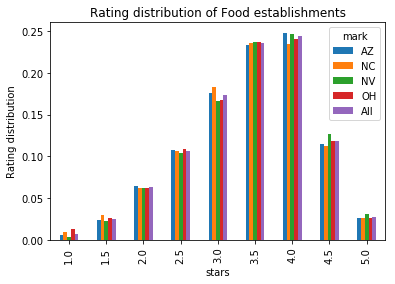

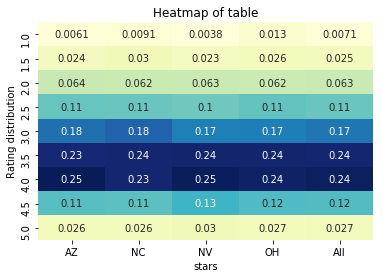

In [0]:
# Your code here
table1.plot.bar()
plt.legend(title='mark')
plt.ylabel('Rating distribution')
plt.xlabel('stars')
plt.title('Rating distribution of Food establishments')
plt.show()

sns.heatmap(table1, cmap="YlGnBu", annot=True, cbar=False)
plt.ylabel('Rating distribution')
plt.xlabel('stars')
plt.title("Heatmap of table")
plt.show()

### Problem 16: (5 points)

<span  style="color:purple; font-size:16px">Using the `food_establishments` data, calculate the *median*, *mean*, *standard deviation*, *minimum*, *maximum*, and *number of observations* for food establishments with/without a *Happy Hour* by using the `attributes_happyhour` variable.</span>

In [0]:
# Your code here
True_happyhour_data = food_establishments.loc[food_establishments['attributes_happyhour']==True,'stars']
False_happyhour_data = food_establishments.loc[food_establishments['attributes_happyhour']==False,'stars']

dataframe1 = pd.DataFrame(columns = ['Happy Hour','median','mean','std','min','max','count'])

dataframe1.loc[0] = ["True",True_happyhour_data.median(),True_happyhour_data.mean(),True_happyhour_data.std(), True_happyhour_data.min(), True_happyhour_data.max(),True_happyhour_data.count()]
dataframe1.loc[1] = ["False",False_happyhour_data.median(),False_happyhour_data.mean(),False_happyhour_data.std(), False_happyhour_data.min(), False_happyhour_data.max(),False_happyhour_data.count()]
dataframe1 = dataframe1.set_index('Happy Hour')
dataframe1

,median,mean,std,min,max,count
Happy Hour,,,,,,
True,3.5,3.505561,0.620838,1.0,5.0,3057
False,4.0,3.678161,0.655432,1.5,5.0,435


<span  style="color:purple; font-size:16px">Describe any differences you find for food establishments having a *Happy Hour* and those that do not. Do food establishments with a happy hour seem to typically be higher or lower rated than food establishments without a happy hour? Do most food establishments offer a happy hour?</span>

#### Written Answer:

*{Type your answer here}*

As we can see above result table, we can know very easily that the food establishments having a Happy Hour is lowerthan not having one because the mean with Happy Hour is lower than the mean without Happy Hour.

The most food establiskments offer a happy hour because the count with Happy Hour is further larger than without it as we can see above result table.



### Problem 17: (5 points)

<span  style="color:purple; font-size:16px">Let's investigate differences in food establishments with/without a Happy Hour using an appropriate visualization.</span>
    
<span  style="color:purple; font-size:16px">First, create a new variable for the `food_establishments` table called `binned_review_count` that bins the `review_count` variable as: 
    
 + '[0-10]' = having between 0 and 10 reviews inclusive
 + '(10,100]' = having between 10 and 100 reviews
 + '(100,1,000]' = having between 100 and 1,000 reviews
 + '1,000 +` = more than one thousand reviews.
</span>

<span  style="color:purple; font-size:16px">Create a side-by-side violin plot with `binned_review_count` on the y-axis, `stars` on the x-axis, and allow the rating distributions to differ for establishments **with and without a Happy Hour** by using the `split = True` argument. As always, provide an appropriate title and axes labels.</span>

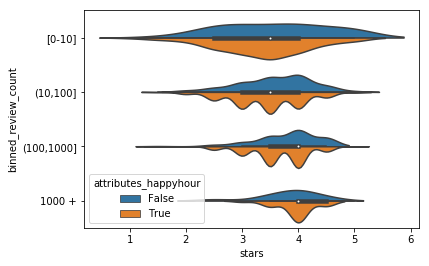

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends,State,binned_review_count
2,1440 N. Dysart Ave,NaN,8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,1,33.448106,-112.341302,Filiberto's Mexican Food,NaN,85323,40,2.5,AZ,1,Arizona,"(10,100]"
3,2801 N 15th Ave,True,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,1,33.479807,-112.091188,Original Hamburger Works,NaN,85007,277,4.0,AZ,1,Arizona,"(100,1000]"
4,4131 N 83rd Ave,NaN,3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,1,33.495298,-112.236076,Rib Shop,NaN,85033,3,2.5,AZ,0,Arizona,[0-10]
5,7745 W Thomas Rd,NaN,CeuTRtwsq6w5rztGOyNMPg,"Mexican, Restaurants",Phoenix,1,33.479671,-112.225173,Salsitas,NaN,85033,14,2.5,AZ,0,Arizona,"(10,100]"
9,4145 N 83Rd,NaN,AcGRSWCpb7YB95MTsHlGEw,"Pizza, Fast Food, Restaurants",Phoenix,1,33.495422,-112.235798,Little Caesars Pizza,NaN,85033,4,2.0,AZ,1,Arizona,[0-10]


In [0]:
# Your code here
cut_labels = ['[0-10]', '(10,100]', '(100,1000]', '1000 +']
cut_bins = [0, 10, 100, 1000, 100000]
food_establishments['binned_review_count'] = pd.cut(food_establishments['review_count'], bins=cut_bins, labels=cut_labels)
sns.violinplot( food_establishments['stars'],food_establishments['binned_review_count'], food_establishments['attributes_happyhour'], split=True)
plt.show()

food_establishments.head()

Describe what you see in the plot.

#### Written Answer:

*{Type your answer here}*

We can see the distribution of each rating according with each bins for the case with and without Happy Hour.


### Problem 18: (5 points)

<span  style="color:purple; font-size:16px">Suppose you work at Yelp. You have been tasked with a new initiative to create a new award for the highest performing food establishments represented on the Yelp platform. The team at Yelp has determined that any food establishment that has both the highest `stars` rating **AND** the largest total number of reviews (`review_count`) in their city *deserves* the **Best Local Food Establishment Award**. You have been tasked with writing Python code that can determine which food establishments in a data set deserve this new prestigious award.</span>

<span  style="color:purple; font-size:16px">For this exercise, create a DataFrame containing all the food establishments in the `food_establishments` data that deserve **Best Local Food Establishment Award** for every city/state combination (to avoid issues with cities that have the same name). The final table that you are to create, called `best_food_establishments`, should provide the `name`, `city`, `state`, `review_count`, and `stars` ratings of all of the food establishments that deserve the award.</span>

Important Notes: There are some slight variations in some city names like: LasVegas, Las Vegas, las vegas. You do not need to worry about cleaning this up before performing your analysis, this is really a proof-of-concept for your team. Also, some cities will have no food establishments that deserve to receive this award as it is possible that the food establishment with the largest number of reviews **does not** have the highest rating in the city.

In [0]:
# Your code here
best_food_establishments = food_establishments.loc[food_establishments['stars']==5.0]
best_food_establishments = best_food_establishments.loc[best_food_establishments['review_count']==best_food_establishments['review_count'].max()]
best_food_establishments = best_food_establishments.loc[:,['name', 'city', 'state', 'review_count','stars']]
best_food_establishments

,name,city,state,review_count,stars
8332,Little Miss BBQ,Phoenix,AZ,1746,5.0


### Problem 19: (10 points)

<span  style="color:purple; font-size:16px">Subsequent questions involve the `data-sets/yelp_academic_dataset_review.csv` data. Let's investigate the relationship between the data for businesses remaining in `business_data` (we subset the data in a previous problem, you can use it as is) and the `data-sets/yelp_academic_dataset_review.csv` data. One thing that would interesting to know is, does it appear that we have all the reviews for each business? For example: if we see a business in `business_data` has 14 reviews, does the review table contain all 14 of those reviews?</span>

<span  style="color:purple; font-size:16px">To determine whether this is the case:
    
  + Import the `data-sets/yelp_academic_dataset_review.csv` data.
  + Subset the reviews data to only contain records for businesses in the `business_data` table.
  + Use `groupby()` to get the counts of reviews for every unique business (by `business_id`) in the reviews data.
  + Perform an appropriate join to the `business_data` table to create a DataFrame containing three columns: 
      1. `business_id`
      1. `number_reviews` - the number of reviews for that particular business you found in the review table, 
      1. `review_count` - the number of reviews listed in the `food_establishments` table
  + Create a new column `abs_diff` containing the absolute value of the difference in the number of reviews for each business in `business_data` and number of reviews from the reviews table.
  + Create a plot that helps us see the extent of any disparities between the number of reviews in the review data and the number of reviews stated in the `business_id` table.
  + Use the `describe()` method to numerically describe the extent of any disparities between the number of reviews in the `review_data` and the number of reviews stated in the `business_id` table in the `review_count` field.
</span>

In [0]:
# Import the review data

review_data = pd.read_csv(r'data-sets/yelp_academic_dataset_review.csv')
review_data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g


In [0]:
# Your code here
Subset_review_data = pd.merge(left=review_data, right=business_data['business_id'], left_on='business_id', right_on='business_id')

Subset_review_data.head()


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g
1,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-10-25,0.0,VluIpojME0yKOcRKI5L0Iw,3.0,"came here on Monday, no line. its good, but no...",0.0,D1_nrBr4dOrs7M82OaBRwQ
2,iCQpiavjjPzJ5_3gPD5Ebg,0,2016-05-22,0.0,nsB9JAeghk0zOaSulSm9Yw,5.0,This place is truly a secret! Its so hidden t...,0.0,jEjc8HxeCeI22M4di0Y1aw
3,iCQpiavjjPzJ5_3gPD5Ebg,0,2014-12-30,0.0,pcn01EMERpCpHEcoaohdEg,5.0,This SECRET PIZZA was a secret for about 5 st...,0.0,RTiaaHSN80VRTLSdNK5rfQ
4,iCQpiavjjPzJ5_3gPD5Ebg,0,2013-03-24,0.0,0mFtAPTmInbXHqDjX9eiOg,5.0,this is the BEST place to grab a quick slice o...,0.0,hBmJs49zYcXdV4wo8F5iiA


In [0]:
groupData = Subset_review_data.groupby('business_id').count()
groupData.head()

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
--6MefnULPED_I942VcFNA,39,39,39,39,39,39,39,39
--7zmmkVg-IMGaXbuVd0SQ,54,54,54,54,54,54,54,54
--8LPVSo5i0Oo61X01sV9A,4,4,4,4,4,4,4,4
--9QQLMTbFzLJ_oT-ON3Xw,11,11,11,11,11,11,11,11
--9e1ONYQuAa-CB_Rrw7Tw,1546,1546,1546,1546,1546,1546,1546,1546


Describe what you see in the plot and the output from `describe()`. Does it appear that we have the all or most of the reviews for every business in the `business_data` table?

In [0]:
rawData = pd.DataFrame()
rawData['business_id'] = groupData.index.tolist()
rawData['number_reviews'] = np.array(groupData['cool'])

Subset_review_data1 = pd.merge(left=business_data, right=rawData, left_on='business_id', right_on='business_id')
Subset_review_data1 = Subset_review_data1.loc[:,['business_id','number_reviews','review_count']]

Subset_review_data1.head()

,business_id,number_reviews,review_count
0,bFzdJJ3wp3PZssNEsyU23g,8,8
1,45bWSZtniwPRiqlivpS8Og,62,63
2,8-NRKkPY1UiFXW20WXKiXg,40,40
3,_c3ixq9jYKxhLUB0czi0ug,277,277
4,3ByGQOVgds2YEu6kzl-XEQ,3,3


In [0]:
Subset_review_data1['abs_diff'] = np.abs(Subset_review_data1['number_reviews']-Subset_review_data1['review_count'])

Subset_review_data1.head()

,business_id,number_reviews,review_count,abs_diff
0,bFzdJJ3wp3PZssNEsyU23g,8,8,0
1,45bWSZtniwPRiqlivpS8Og,62,63,1
2,8-NRKkPY1UiFXW20WXKiXg,40,40,0
3,_c3ixq9jYKxhLUB0czi0ug,277,277,0
4,3ByGQOVgds2YEu6kzl-XEQ,3,3,0


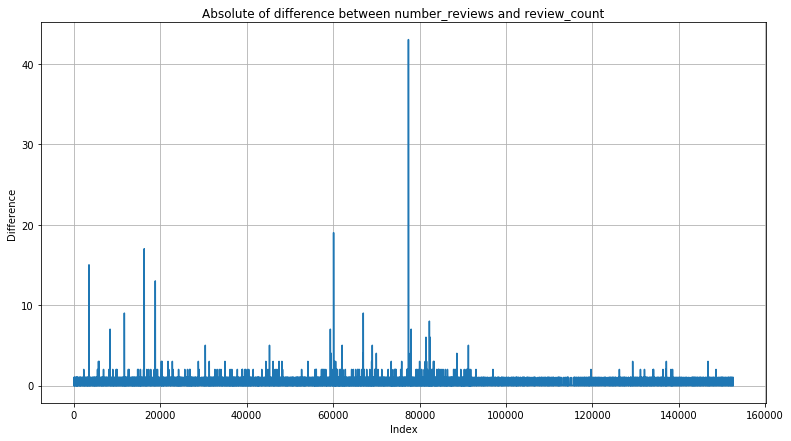

In [0]:
plt.figure(figsize=(13,7))
plt.plot( Subset_review_data1['abs_diff'] )
plt.grid()
plt.xlabel('Index'); plt.ylabel('Difference'); plt.title('Absolute of difference between number_reviews and review_count')
plt.show()

In [0]:
Subset_review_data1.describe()

,number_reviews,review_count,abs_diff
count,152599.000000,152599.000000,152599.000000
mean,34.756591,34.755372,0.023565
std,113.296817,113.296344,0.219575
min,1.000000,3.000000,0.000000
25%,4.000000,4.000000,0.000000
50%,9.000000,9.000000,0.000000
75%,26.000000,26.000000,0.000000
max,7968.000000,7968.000000,43.000000


Describe what you see in the plot and the output from `describe()`. Does it appear that we have the all or most of the reviews for every business in the `business_data` table?

#### Written Answer:

*{Type your answer here}*

We can see abvolutely errors between number_reviews and review_count corresponding with each index from the plot and can see the feature values for each columns from the output of describe().
As we can see above results, it don't appear that we have all the reviews for each business because abs_diff has some of values.


In [0]:
# Import the user data table

user_data = pd.read_csv(r'data-sets/yelp_academic_dataset_user.csv')
user_data.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18


---

## Wrapping up

In this section of the exercise, you will be focused on analyzing the Yelp users and the reviews they leave. Unlike the previous part, you will not be guided through each step and must decide how best to proceed.

Your analyses will involve the following 3 tables:

+ `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review.

+ `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`

+ `yelp_academic_dataset_business.csv` - contains information about a subset of businesses having at least one Yelp review and every distinct business has a unique `business_id`. This is the table that we have been analyzing in Problems 1-19. 


### Problem 20: Time Based Analysis (20 points)

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `date` representing the date the review was created.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Are more reviews posted during certain days of the week? What about certain months of the year? What patterns can you find about when reviews are posted? Draw a suitable plot.

1. Do reviews made on certain days of the week or certain months of the year tend to be higher/lower rated? What relationship can you find between the `stars` ratings of a review and when the reviews was posted? Draw a suitable plot.

In [0]:
# Your code here
# I select problem 1.
Subset_review_data['Date_converted'] = pd.to_datetime(Subset_review_data['date'])
Subset_review_data['dayOfweek'] = Subset_review_data['Date_converted'].dt.dayofweek
Subset_review_data['monthOfyear'] = Subset_review_data['Date_converted'].dt.month

Subset_review_data.head(10)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,Date_converted,dayOfweek,monthOfyear
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2011-02-25,4,2
1,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-10-25,0.0,VluIpojME0yKOcRKI5L0Iw,3.0,"came here on Monday, no line. its good, but no...",0.0,D1_nrBr4dOrs7M82OaBRwQ,2011-10-25,1,10
2,iCQpiavjjPzJ5_3gPD5Ebg,0,2016-05-22,0.0,nsB9JAeghk0zOaSulSm9Yw,5.0,This place is truly a secret! Its so hidden t...,0.0,jEjc8HxeCeI22M4di0Y1aw,2016-05-22,6,5
3,iCQpiavjjPzJ5_3gPD5Ebg,0,2014-12-30,0.0,pcn01EMERpCpHEcoaohdEg,5.0,This SECRET PIZZA was a secret for about 5 st...,0.0,RTiaaHSN80VRTLSdNK5rfQ,2014-12-30,1,12
4,iCQpiavjjPzJ5_3gPD5Ebg,0,2013-03-24,0.0,0mFtAPTmInbXHqDjX9eiOg,5.0,this is the BEST place to grab a quick slice o...,0.0,hBmJs49zYcXdV4wo8F5iiA,2013-03-24,6,3
5,iCQpiavjjPzJ5_3gPD5Ebg,0,2015-08-27,0.0,zIXQT3hLQ5KyBLUkLtn--A,5.0,"Never heard about this ""Secret Pizza"" place bu...",0.0,waUrPSBpHvrnrEtSVCEiYQ,2015-08-27,3,8
6,iCQpiavjjPzJ5_3gPD5Ebg,0,2013-10-18,0.0,0QClTrMOCNdiGNueot0ZNw,4.0,Secret pizza is a hidden gem inside The Cosmop...,0.0,1Yq4Xv1W_pA7VfD6GusuxA,2013-10-18,4,10
7,iCQpiavjjPzJ5_3gPD5Ebg,0,2012-02-02,0.0,A27Vb7Bsz5dD5JJgBkQWzw,4.0,"this place is good, real good. the pizza in my...",1.0,neGH9zU2RG1F3fD-c4_ykg,2012-02-02,3,2
8,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-26,0.0,-2pmDcTj_mKceY0JxMB15w,4.0,"Mmmm. Reminds me of the pizza back in NYC, whe...",1.0,7XTQK7OX-d_Fiv05uhNydw,2011-02-26,5,2
9,iCQpiavjjPzJ5_3gPD5Ebg,1,2011-08-18,1.0,Lj8a0R6YEKBZAw7I9SC1Uw,5.0,This place is a hidden gem... literally hidden...,1.0,Maj7Gl89JLK9Sp21ckrvew,2011-08-18,3,8


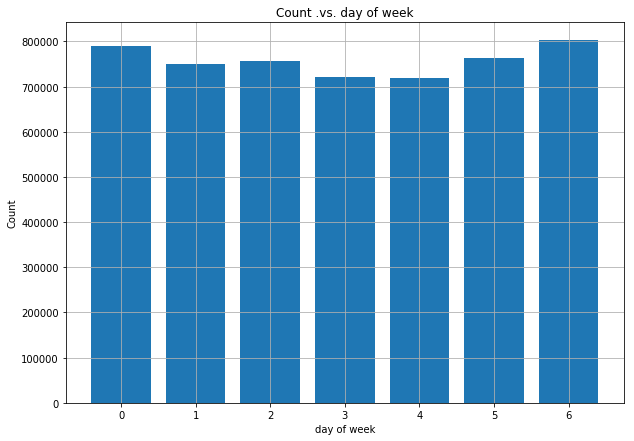

,dayOfweek,count
0,0,789360
1,1,749876
2,2,757086
3,3,721309
4,4,719365
5,5,764420
6,6,802405


In [0]:
dayData = Subset_review_data.groupby('dayOfweek').count()

dayofData = pd.DataFrame()
dayofData['dayOfweek'] = dayData.index.tolist()
dayofData['count'] = np.array(dayData['cool'])

plt.figure(figsize=(10,7))
plt.bar( dayofData['dayOfweek'],dayofData['count'])
plt.grid()
plt.xlabel('day of week'); plt.ylabel('Count'); plt.title('Count .vs. day of week')
plt.show()

dayofData

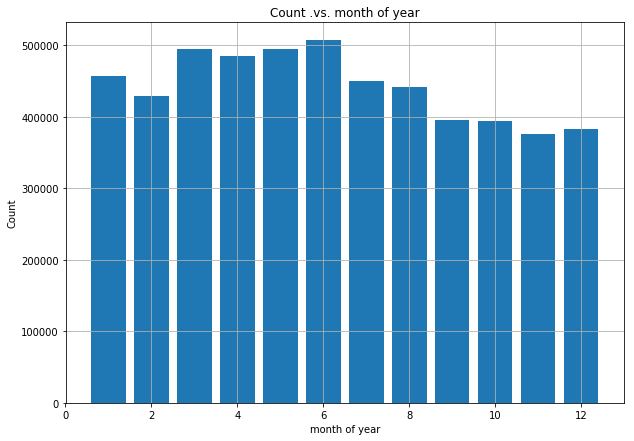

,monthOfyear,count
0,1,456348
1,2,429515
2,3,494639
3,4,484387
4,5,494236
5,6,506813
6,7,449336
7,8,440948
8,9,395269
9,10,394105


In [0]:
monthData = Subset_review_data.groupby('monthOfyear').count()
monthOfyear = pd.DataFrame()
monthOfyear['monthOfyear'] = monthData.index.tolist()
monthOfyear['count'] = np.array(monthData['cool'])

plt.figure(figsize=(10,7))
plt.bar( monthOfyear['monthOfyear'],monthOfyear['count'])
plt.grid()
plt.xlabel('month of year'); plt.ylabel('Count'); plt.title('Count .vs. month of year')
plt.show()

monthOfyear

<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

*{Type your answer here}*

As we can see the figure for day of week, we can know  very easily that the most reviews are posted at Sunday. 

As we can see the figure for month of year, we can know very easily that the most reviews are posted at 6 month. 


### Problem 21: Text Based Analysis (20 points)

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `text` containing the full text of the review. Use these data to answer one of the questions below.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Can you classify a review as having a *positive* or *negative* sentiment? If so, select five particular businesses (by `business_id`) and compare the business's average `stars` rating from the `business_data` to the proportion of reviews you have identified as having `positive` or `negative` sentiment for those particular businesses. Draw a suitable plot.

1. Do reviews with exclamation points seem to be either very highly rated or very low rated? Determine the `stars` distribution as a function of the number of exclamation points used in the review. Draw a suitable plot.


In [0]:
# Your code here
# I select problem 2.
textData = Subset_review_data['text']
filter_data = [True]*len(textData)
for n in range(len(textData)):
    if str(textData[n]).__contains__('!') :
        filter_data[n] = True
    else:
        filter_data[n] = False
        
Subset_review_data["category_flag"]= filter_data

In [0]:
True_data = Subset_review_data.loc[Subset_review_data['category_flag']==True,'stars']
False_data = Subset_review_data.loc[Subset_review_data['category_flag']==False,'stars']

dataframe1 = pd.DataFrame(columns = ['exclamation_Flage','median','mean','std','min','max','count'])

dataframe1.loc[0] = ["True",True_data.median(),True_data.mean(),True_data.std(), True_data.min(), True_data.max(),True_data.count()]
dataframe1.loc[1] = ["False",False_data.median(),False_data.mean(),False_data.std(), False_data.min(), False_data.max(),False_data.count()]
dataframe1 = dataframe1.set_index('exclamation_Flage')
dataframe1

,median,mean,std,min,max,count
exclamation_Flage,,,,,,
True,5.0,4.040116,1.368782,1.0,5.0,2657437
False,4.0,3.429869,1.483876,1.0,5.0,2646384


In [0]:
table2 = pd.crosstab(Subset_review_data.stars, Subset_review_data.category_flag, normalize='columns',margins=True)

table2

category_flag,False,True,All
stars,,,
1.0,0.175540,0.118075,0.146748
2.0,0.114708,0.046835,0.080701
3.0,0.151169,0.068571,0.109783
4.0,0.221509,0.209936,0.215711
5.0,0.337074,0.556583,0.447057


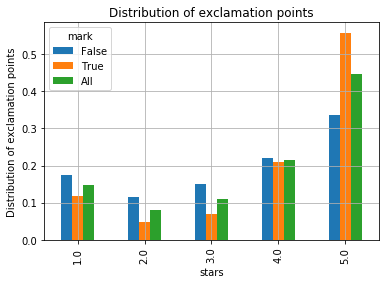

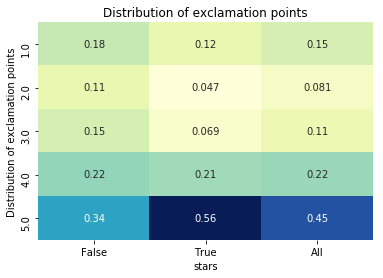

In [0]:
table2.plot.bar()
plt.legend(title='mark')
plt.ylabel('Distribution of exclamation points')
plt.xlabel('stars')
plt.title('Distribution of exclamation points')
plt.grid()
plt.show()

sns.heatmap(table2, cmap="YlGnBu", annot=True, cbar=False)
plt.ylabel('Distribution of exclamation points')
plt.xlabel('stars')
plt.title('Distribution of exclamation points')
plt.show()

<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

*{Type your answer here}*

As we can see from exclamation_Flage table, The reviews with exclamation are very highly rated than without exclamation because the mean with exclamation is larger than without one.

And also, as can see 'Distribution of exclamation points' figure, we can know that the reviews with exclamation are distributed on rounding of rating 5 almost.


### Problem 22: Analysis of Users (20 points)

<span  style="color:purple; font-size:16px">Create a function that accepts at least a `user_id` as input. This function use the `yelp_academic_dataset_user.csv` data as well as the `yelp_academic_dataset_review.csv` or `yelp_academic_dataset_business.csv` tables as necessary.</span>

<span  style="color:purple; font-size:16px">The function should automatically process the data relevant to the `user_id` passed and create at least one plot annotated with relevant, interesting information about the user that best answers the following questions:</span>

**What types of businesses has the user reviewed? Summarize the users review ratings by business category.**

Tip: It is OK if the results of your function are not very interesting for users with only a small number of reviews but your function should produce something reasonable for any `user_id` that may be passed.

In [0]:
# Your code here
def user_analysis(user_list, Subset_review_data):
#     user_frame = pd.DataFrame()
#     user_frame['user_id'] = user_list

#     data = pd.merge(left=Subset_review_data,right=user_frame, left_on='user_id', right_on='user_id')
#     rate_list = []
    summaryData = pd.DataFrame(columns = ['user_id','median','mean','std','min','max','count'])
    data = []
    for n in range(len(user_list)):
        tmp = Subset_review_data.loc[Subset_review_data['user_id']==user_list[n]]
        tmp = tmp['stars']
        data.append(np.array(tmp))
        summaryData.loc[n] = [user_list[n],tmp.median(),tmp.mean(),tmp.std(), tmp.min(), tmp.max(),tmp.count()]
       
    return data, summaryData



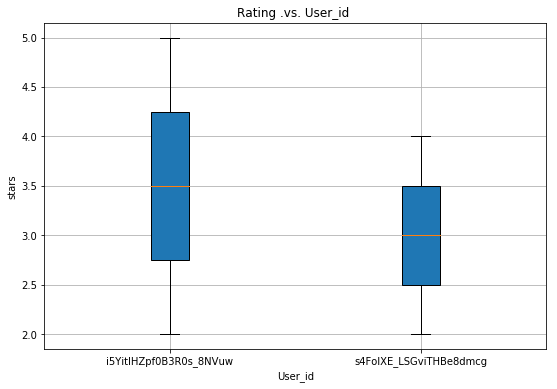

,user_id,median,mean,std,min,max,count
0,i5YitlHZpf0B3R0s_8NVuw,3.5,3.5,2.121320,2.0,5.0,2
1,s4FoIXE_LSGviTHBe8dmcg,3.0,3.0,1.414214,2.0,4.0,2


In [0]:
user_list = ['i5YitlHZpf0B3R0s_8NVuw','s4FoIXE_LSGviTHBe8dmcg']
data, summaryData = user_analysis(user_list, review_data)

plt.figure(figsize=(9,6))
plt.boxplot(data, labels=user_list, patch_artist=True)
plt.xlabel('User_id')
plt.ylabel('stars')
plt.title('Rating .vs. User_id ')
plt.grid()
plt.show()

summaryData

In [0]:
data

[array([5., 2.]), array([4., 2.])]